In [3]:
%run ./msgc_experiments_ct_init.ipynb

Populating the interactive namespace from numpy and matplotlib


In [4]:
import imma

# Data screenshots

Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
Unable to read dicom file dicomdir.pkl
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


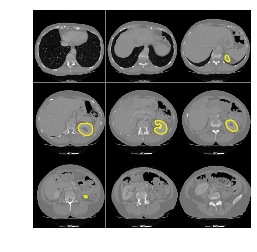

In [5]:

img, true_segmentation, seeds, voxelsize_mm, orig_vs_mm = prepare_data(1, "left_kidney")
# plt.figure(figsize=(10,15))
plt.figure()
import copy
imgview = copy.copy(img)
imgview[:,:,-1] = 0
imgview[:,-1,:] = 0
imgview[-1,:,:] = 0
# sed3.show_slices(imgview, contour=seg, seeds=seeds, show=False, slice_step=16.9, first_slice_offset_to_see_seed_with_label=2)
sed3.show_slices(imgview, 
                 contour=(true_segmentation > 0).astype(np.int) * 3, 
                 show=False, shape=[3,3], 
#                  first_slice_offset_to_see_seed_with_label=2
                )
plt.axis("off")
# plt.savefig("../graphics/msgc-ct-imgsample_separated.png")

plt.savefig(
    latex_dir / "ircadb01_slices_uncropped.png", 
    dpi=dpi, bbox_inches='tight')

# Data processing graphs, statistics

In [6]:
df = pd.read_csv(fnamenew)
df.rename(columns={"msgc time": "MSGC time"})
# dfs = df[(df["data seedsz"]==3) & (df["data offset"] == 3) & (df["data radius"] == 10)]
# dfs_plus = dfs[dfs['data size'] > 160]

import seaborn as sns
sns.set_context("paper")
sns.set_style("white")

In [7]:
# temp fixutre

if "data orig voxesize mm 0" in df.keys():
    print("je to tam")
    df = df.rename(columns={
        "data orig voxesize mm 0": "data orig voxelsize mm 0",
        "data orig voxesize mm 1": "data orig voxelsize mm 1",
        "data orig voxesize mm 2": "data orig voxelsize mm 2",
        "data voxesize mm 0": "data voxelsize mm 0",
        "data voxesize mm 1": "data voxelsize mm 1",
        "data voxesize mm 2": "data voxelsize mm 2",
        "data voxesize mm^3": "data voxelsize mm^3",
              })

je to tam


In [8]:
df["relative object size"] = df["data target size px"] / df["data size px"]
df["relative object size [%]"] = 100 * df["data target size px"] / df["data size px"]
df["data orig size 0"] = df["data size 0"] * df["data voxelsize mm 0"]/df["data orig voxelsize mm 0"]
df["VOE [%]"] = df["error"] / df["data target size px"]

In [9]:
dfs = df
dfs.keys()

Index(['_create_nlinks time', 'block size', 'data id', 'data organ key',
       'data orig voxelsize mm 0', 'data orig voxelsize mm 1',
       'data orig voxelsize mm 2', 'data segmentation size px', 'data size 0',
       'data size 1', 'data size 2', 'data size px', 'data target size px',
       'data voxelsize mm 0', 'data voxelsize mm 1', 'data voxelsize mm 2',
       'data voxelsize mm^3', 'edge number', 'error',
       'experiment iteration start time', 'gc time', 'low level image voxels',
       'low level object voxels', 'machine hostname', 'method',
       'nlinks number', 't graph 01', 't graph 10', 't graph 11', 't graph 13',
       't graph 14', 't graph high', 't graph low', 't split 01', 't split 02',
       't split 03', 't split 04', 't split 05', 't split 06', 't split 07',
       't split 08', 't split 081', 't split 082', 't split 0821',
       't split 09', 't split 10', 't1', 't10', 't2', 't3', 't3.1', 't3.2',
       't3.3', 't4', 't5', 't6', 't7', 't8', 't9', 'time

In [10]:

dfs

,_create_nlinks time,block size,data id,data organ key,data orig voxelsize mm 0,data orig voxelsize mm 1,data orig voxelsize mm 2,data segmentation size px,data size 0,data size 1,...,t6,t7,t8,t9,time,tlinks number,relative object size,relative object size [%],data orig size 0,VOE [%]
0,5.766579,10,1,left_kidney,1.6,0.570000,0.570000,7899696,159,225,...,NaN,NaN,NaN,NaN,56.486965,8049375,0.008251,0.825120,129.187498,255.883644
1,2.253976,10,1,left_kidney,1.6,0.570000,0.570000,7958982,159,225,...,13.892885,21.441667,43.985390,44.034261,58.131531,2153571,0.008251,0.825120,129.187498,254.910279
2,0.004987,10,1,left_kidney,1.6,0.570000,0.570000,7953037,159,225,...,230.287257,230.287257,NaN,230.415882,239.389953,2515427,0.008251,0.825120,129.187498,254.999789
3,8.892193,10,5,left_kidney,1.6,0.782000,0.782000,16002264,172,308,...,NaN,NaN,NaN,NaN,131.103456,16316608,0.006062,0.606235,139.749998,256.826885
4,3.779895,10,5,left_kidney,1.6,0.782000,0.782000,16072293,172,308,...,23.513129,36.919284,74.184645,74.247510,99.370304,4746648,0.006062,0.606235,139.749998,256.042702
5,0.006981,10,5,left_kidney,1.6,0.782000,0.782000,16069107,172,308,...,598.019982,598.019982,NaN,598.240394,614.604673,4255371,0.006062,0.606235,139.749998,256.074911
6,8.848342,10,6,left_kidney,1.6,0.782000,0.782000,15510422,167,308,...,NaN,NaN,NaN,NaN,124.833223,15842288,0.004911,0.491091,135.687498,257.914499
7,3.644224,10,6,left_kidney,1.6,0.782000,0.782000,15644231,167,308,...,22.665397,39.062556,73.092567,73.162410,104.594336,5624068,0.004911,0.491091,135.687498,256.164434
8,0.004986,10,6,left_kidney,1.6,0.782000,0.782000,15643220,167,308,...,982.652398,982.652398,NaN,982.918688,1007.032177,5477224,0.004911,0.491091,135.687498,256.177429
9,10.910827,10,7,left_kidney,1.6,0.782000,0.782000,17330866,186,308,...,NaN,NaN,NaN,NaN,175.228526,17644704,0.003828,0.382829,151.124998,258.015293


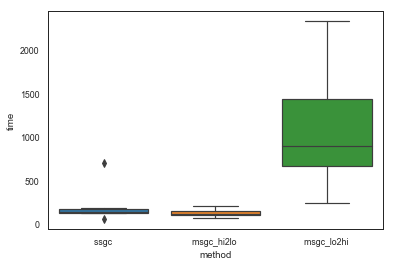

In [11]:
sns.boxplot(data=df, y="time", x="method")

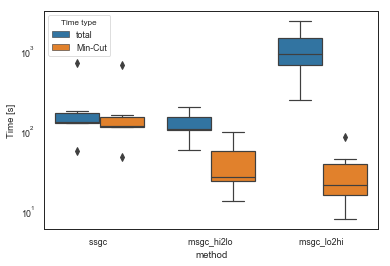

In [12]:
mfmc_label = "Min-Cut"
rename_bp = {"gc time": mfmc_label, "time": "total"}
uu = pd.melt(df.rename(columns=rename_bp), value_vars=[mfmc_label, "total"], id_vars=["method"], var_name="Time type", value_name="Time [s]")
bp = sns.boxplot(data=uu, hue="Time type",y="Time [s]", x="method", 
#                  showfliers=False, 
                 hue_order=["total", mfmc_label],
                )
# bp.set(xaxis="log")
bp.set(yscale="log")
plt.savefig(op.join(latex_dir, "msgc_time_boxplot_ct.pdf"), dpi=1000)

In [13]:
# uu["method"] == "msgc_lo2hi"
uu[uu["method"] == "msgc_lo2hi "]


,method,Time type,Time [s]
2,msgc_lo2hi,Min-Cut,7.987640
5,msgc_lo2hi,Min-Cut,14.618911
8,msgc_lo2hi,Min-Cut,22.565665
11,msgc_lo2hi,Min-Cut,19.598596
14,msgc_lo2hi,Min-Cut,82.400678
17,msgc_lo2hi,Min-Cut,43.752438
20,msgc_lo2hi,total,239.389953
23,msgc_lo2hi,total,614.604673
26,msgc_lo2hi,total,1007.032177
29,msgc_lo2hi,total,784.689900


In [14]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t3", "t4", "t5", "t6", "t7", "t8"], index=['method'], 
    aggfunc={'gc time': np.mean, 'time': [np.mean, min, max], "t3": np.mean,"t4": np.mean, "t5": np.mean, "t6": np.mean, "t7": np.mean, "t8": np.mean}
)
table

gc time        t3           t4           t5           t6  \
                   mean      mean         mean         mean         mean   
method                                                                     
msgc_hi2lo    41.811891  0.485222     3.505989     7.941802    24.545930   
msgc_lo2hi    31.820655  0.596543  1054.064100  1059.092315  1060.065712   
ssgc         200.208196       NaN          NaN          NaN          NaN   

                      t7         t8         time                           
                    mean       mean          max         mean         min  
method                                                                     
msgc_hi2lo     40.928017  77.838642   197.966729   121.498467   58.131531  
msgc_lo2hi   1060.065712        NaN  2334.101257  1093.940190  239.389953  
ssgc                 NaN        NaN   700.648600   219.261072   56.486965

In [15]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t2", "t3", "t3.1", "t3.2", "t3.3", "t4", "t5", "t6", "t7", "t8", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.min
)
table

,gc time,low level image voxels,low level object voxels,t2,t3,t3.1,t3.2,t3.3,t4,t5,t6,t7,t8,time
method,,,,,,,,,,,,,,
msgc_hi2lo,13.063071,8464.0,38.0,0.263294,0.267288,NaN,NaN,NaN,2.202110,4.526894,13.892885,21.441667,43.98539,58.131531
msgc_lo2hi,7.987640,8464.0,45.0,0.335105,0.340055,0.340055,0.485666,227.106728,227.106728,229.774595,230.287257,230.287257,NaN,239.389953
ssgc,46.332080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.486965


In [16]:
table = pd.pivot_table(
    dfs, values=['gc time', 'time', "t graph 01", "t graph 10", "t graph 11", "t graph 13", "t graph 14", "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph 01,t graph 10,t graph 11,t graph 13,t graph 14,time
method,,,,,,,,,
msgc_hi2lo,41.811891,18415.833333,225.166667,NaN,NaN,NaN,NaN,NaN,121.498467
msgc_lo2hi,31.820655,18415.833333,230.333333,0.254824,0.25898,0.259645,1052.582909,1053.466392,1093.940190
ssgc,200.208196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.261072


In [17]:
table = pd.pivot_table(
    dfs, values=[
        'gc time', 'time',  
        "t graph low",
        "t graph high",
        "t split 01",
        "t split 02",
        "t split 03",
        "t split 04",
        "t split 05",
        "t split 06",
        "t split 07",
        "t split 08",
        "t split 081",
        "t split 082",
        "t split 09",
        "t split 10",
        "low level image voxels", "low level object voxels"], index=['method'], 
    aggfunc=np.mean
)
table

,gc time,low level image voxels,low level object voxels,t graph high,t graph low,t split 01,t split 02,t split 03,t split 04,t split 05,t split 06,t split 07,t split 08,t split 081,t split 082,t split 09,t split 10,time
method,,,,,,,,,,,,,,,,,,
msgc_hi2lo,41.811891,18415.833333,225.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.498467
msgc_lo2hi,31.820655,18415.833333,230.333333,1052.120787,0.171895,0.002,0.019803,0.044086,0.296497,0.30996,0.649394,1.001618,416.392635,0.0,0.0,712.456573,1009.965425,1093.940190
ssgc,200.208196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.261072


In [18]:
dfs.keys()

Index(['_create_nlinks time', 'block size', 'data id', 'data organ key',
       'data orig voxelsize mm 0', 'data orig voxelsize mm 1',
       'data orig voxelsize mm 2', 'data segmentation size px', 'data size 0',
       'data size 1', 'data size 2', 'data size px', 'data target size px',
       'data voxelsize mm 0', 'data voxelsize mm 1', 'data voxelsize mm 2',
       'data voxelsize mm^3', 'edge number', 'error',
       'experiment iteration start time', 'gc time', 'low level image voxels',
       'low level object voxels', 'machine hostname', 'method',
       'nlinks number', 't graph 01', 't graph 10', 't graph 11', 't graph 13',
       't graph 14', 't graph high', 't graph low', 't split 01', 't split 02',
       't split 03', 't split 04', 't split 05', 't split 06', 't split 07',
       't split 08', 't split 081', 't split 082', 't split 0821',
       't split 09', 't split 10', 't1', 't10', 't2', 't3', 't3.1', 't3.2',
       't3.3', 't4', 't5', 't6', 't7', 't8', 't9', 'time

# Dataset description

In [19]:
dfsu = dfs[["data id", "data orig voxelsize mm 0", "data orig voxelsize mm 1", "relative object size [%]", 'data size px', 'data target size px', "data orig size 0"]].drop_duplicates().describe()
dfsu

,data id,data orig voxelsize mm 0,data orig voxelsize mm 1,relative object size [%],data size px,data target size px,data orig size 0
count,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,8.333333,1.666667,0.740766,0.489547,1.771850e+07,70974.333333,152.289582
std,6.562520,0.163299,0.088649,0.226511,9.266937e+06,16141.202281,36.685493
min,1.000000,1.600000,0.570000,0.144708,8.049375e+06,51098.000000,129.187498
25%,5.250000,1.600000,0.735500,0.408947,1.382077e+07,64653.000000,133.249998
50%,6.500000,1.600000,0.782000,0.489195,1.607945e+07,66983.000000,137.718748
75%,10.000000,1.600000,0.782000,0.577449,1.731268e+07,75237.250000,148.281248
max,20.000000,2.000000,0.808594,0.825120,3.531107e+07,98917.000000,225.550000


In [20]:
#  pivot_table(dfsu, values='D', index=[''],
# ...                     columns=['C'], aggfunc=np.sum)

In [21]:
help(dtt.save)

Help on function save in module data2tex:

save(data, filename, precision=4, scientific_notation=None, python_implementation=False, index=False)
    :param data:
    :param filename:
    :param precision: round precision
    :param scientific_notation: None or False (13141), True (1.3141*10^4) or "engineering" (13.141 *10^3)
    Format is done in LaTeX macro from siunitx package.
    :param python_implementation:
    The python implementation of scientific formating is used if this parameter is set True. Obsolete.
    :return:



In [22]:
df[["data orig size 0", "data size 0", "data orig voxelsize mm 0", "data voxelsize mm 0"]]

,data orig size 0,data size 0,data orig voxelsize mm 0,data voxelsize mm 0
0,129.187498,159,1.6,1.3
1,129.187498,159,1.6,1.3
2,129.187498,159,1.6,1.3
3,139.749998,172,1.6,1.3
4,139.749998,172,1.6,1.3
5,139.749998,172,1.6,1.3
6,135.687498,167,1.6,1.3
7,135.687498,167,1.6,1.3
8,135.687498,167,1.6,1.3
9,151.124998,186,1.6,1.3


In [30]:
dtt.save(dfs["data orig voxelsize mm 0"].min(), "data_ct_vxmm0_min")
dtt.save(dfs["data orig voxelsize mm 0"].max(), "data_ct_vxmm0_max")
dtt.save(dfs["data orig voxelsize mm 1"].min(), "data_ct_vxmm1_min")
dtt.save(dfs["data orig voxelsize mm 1"].max(), "data_ct_vxmm1_max")
dtt.save(dfs["data orig voxelsize mm 1"].count(), "data_ct_count")

dtt.save(dfs["relative object size [%]"].min(), "data_ct_relative_object_size_min")
dtt.save(dfs["relative object size [%]"].max(), "data_ct_relative_object_size_max")

dtt.save(int(dfs["data orig size 0"].min()), "data_ct_orig_sz0_min")
dtt.save(int(dfs["data orig size 0"].max()), "data_ct_orig_sz0_max")

dtt.save(working_voxelsize_mm[0], "data_ct_wvs_mm")

In [24]:
dfs["data orig size 0"].min()

129.18749807495627

In [25]:
rename_data = {
    "data orig voxelsize mm 0": "slice thickness [mm]", 
    "data orig voxelsize mm 1": "pixel spacing [mm]", 
    "gc time": mfmc_label + " [s]",
    "time" : "time [s]"
    
#     "voxelsize mm 0": "slice thickness [mm]", 
#     "data voxelsize mm 1": "pixel spacing [mm]", 
}
df_tex = df.rename(columns=rename_data)[[
    "data id", "slice thickness [mm]", "pixel spacing [mm]", mfmc_label + " [s]", "time [s]", "method",
#                                 "VOE [%]"
]]
# df_tex 
dtt.save(df_tex, "data_ct_table")
df_tex

,data id,slice thickness [mm],pixel spacing [mm],Min-Cut [s],time [s],method
0,1,1.6,0.570000,46.332080,56.486965,ssgc
1,1,1.6,0.570000,13.063071,58.131531,msgc_hi2lo
2,1,1.6,0.570000,7.987640,239.389953,msgc_lo2hi
3,5,1.6,0.782000,115.240914,131.103456,ssgc
4,5,1.6,0.782000,23.455252,99.370304,msgc_hi2lo
5,5,1.6,0.782000,14.618911,614.604673,msgc_lo2hi
6,6,1.6,0.782000,109.819366,124.833223,ssgc
7,6,1.6,0.782000,29.803280,104.594336,msgc_hi2lo
8,6,1.6,0.782000,22.565665,1007.032177,msgc_lo2hi
9,7,1.6,0.782000,157.017220,175.228526,ssgc


In [26]:
import os, platform, subprocess, re

def get_processor_name():
    if platform.system() == "Windows":
        return platform.processor()
    elif platform.system() == "Darwin":
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin'
        command ="sysctl -n machdep.cpu.brand_string"
        return subprocess.check_output(command).strip()
    elif platform.system() == "Linux":
        command = "cat /proc/cpuinfo"
        all_info = subprocess.check_output(command, shell=True).strip()
        for line in all_info.split("\n"):
            if "model name" in line:
                return re.sub( ".*model name.*:", "", line,1)
    return ""

In [27]:
get_processor_name()

'Intel64 Family 6 Model 142 Stepping 10, GenuineIntel'

In [28]:
# from psutil import virtual_memory
# virtual_memory()

# Statistics


In [32]:
dfs.keys()

Index(['_create_nlinks time', 'block size', 'data id', 'data organ key',
       'data orig voxelsize mm 0', 'data orig voxelsize mm 1',
       'data orig voxelsize mm 2', 'data segmentation size px', 'data size 0',
       'data size 1', 'data size 2', 'data size px', 'data target size px',
       'data voxelsize mm 0', 'data voxelsize mm 1', 'data voxelsize mm 2',
       'data voxelsize mm^3', 'edge number', 'error',
       'experiment iteration start time', 'gc time', 'low level image voxels',
       'low level object voxels', 'machine hostname', 'method',
       'nlinks number', 't graph 01', 't graph 10', 't graph 11', 't graph 13',
       't graph 14', 't graph high', 't graph low', 't split 01', 't split 02',
       't split 03', 't split 04', 't split 05', 't split 06', 't split 07',
       't split 08', 't split 081', 't split 082', 't split 0821',
       't split 09', 't split 10', 't1', 't10', 't2', 't3', 't3.1', 't3.2',
       't3.3', 't4', 't5', 't6', 't7', 't8', 't9', 'time

In [34]:
from scipy import stats
dfs_plus = dfs
ssgc_rows = dfs_plus[dfs_plus["method"].str.contains(labels[0])]
ssgc_hi2lo_rows = dfs_plus[dfs_plus["method"].str.contains(labels[1])]
ssgc_lo2hi_rows = dfs_plus[dfs_plus["method"].str.contains(labels[2])]
pp0 = stats.ttest_rel(ssgc_rows["time"], ssgc_hi2lo_rows["time"])
pp1 = stats.ttest_rel(ssgc_rows["time"], ssgc_lo2hi_rows["time"])
pp2 = stats.ttest_rel(ssgc_hi2lo_rows["time"], ssgc_lo2hi_rows["time"])

print("pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok") 
#mozna staci i dvojnasobek hladiny vyzamnosi
print("statistic musi byt vetsi nez 0")
display(pp0)
display(pp1)
display(pp2)

float_to_latex_file(pp0.pvalue, op.join(latex_dir, "ttest_pvalue_ct_ssgc_msgc_hi2lo.tex"))
float_to_latex_file(pp1.pvalue, op.join(latex_dir, "ttest_pvalue_ct_ssgc_msgc_lo2hi.tex"))
float_to_latex_file(pp2.pvalue, op.join(latex_dir, "ttest_pvalue_ct_msgc_hi2lo_msgc_lo2hi.tex"))


pokud je pvalue mensi nez zvolena hladina vyznamnosti (0.01=1%), je vsechno ok
statistic musi byt vetsi nez 0


Ttest_relResult(statistic=1.1878508505489844, pvalue=0.2882372538430728)

Ttest_relResult(statistic=-3.7683357681796807, pvalue=0.013045212165415722)

Ttest_relResult(statistic=-3.3829810610567268, pvalue=0.019610452539753739)

In [35]:
ssgc_rows

,_create_nlinks time,block size,data id,data organ key,data orig voxelsize mm 0,data orig voxelsize mm 1,data orig voxelsize mm 2,data segmentation size px,data size 0,data size 1,...,t6,t7,t8,t9,time,tlinks number,relative object size,relative object size [%],data orig size 0,VOE [%]
0,5.766579,10,1,left_kidney,1.6,0.570000,0.570000,7899696,159,225,...,NaN,NaN,NaN,NaN,56.486965,8049375,0.008251,0.825120,129.187498,255.883644
3,8.892193,10,5,left_kidney,1.6,0.782000,0.782000,16002264,172,308,...,NaN,NaN,NaN,NaN,131.103456,16316608,0.006062,0.606235,139.749998,256.826885
6,8.848342,10,6,left_kidney,1.6,0.782000,0.782000,15510422,167,308,...,NaN,NaN,NaN,NaN,124.833223,15842288,0.004911,0.491091,135.687498,257.914499
9,10.910827,10,7,left_kidney,1.6,0.782000,0.782000,17330866,186,308,...,NaN,NaN,NaN,NaN,175.228526,17644704,0.003828,0.382829,151.124998,258.015293
12,7.427141,10,11,left_kidney,1.6,0.720000,0.720000,10929775,163,284,...,NaN,NaN,NaN,NaN,127.265665,13146928,0.004873,0.487300,132.437498,287.722126
15,27.883443,10,20,left_kidney,2.0,0.808594,0.808594,34620298,347,319,...,NaN,NaN,NaN,NaN,700.648600,35311067,0.001447,0.144708,225.550000,266.900485
